<a href="https://colab.research.google.com/github/alexrafkin/ideal-parakeet/blob/main/DataCleaningIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

us_ed = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [ ]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

years = us_ed["YEAR"].unique()

for col in fill_list:
    for year in years:
        us_ed.loc[us_ed["YEAR"] == year, col] = us_ed.loc[us_ed["YEAR"] == year, col].fillna(
            us_ed[us_ed["YEAR"] == year][col].mean())
for col in fill_list:
    us_ed.loc[:, col] = us_ed.loc[:, col].interpolate()        


In [ ]:
us_ed.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

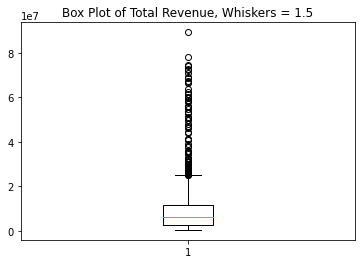

In [ ]:
plt.boxplot(us_ed["TOTAL_REVENUE"])
plt.title('Box Plot of Total Revenue, Whiskers = 1.5')
plt.show()

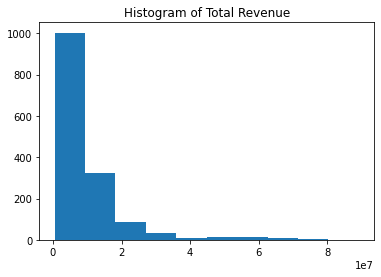

In [ ]:
plt.hist(us_ed["TOTAL_REVENUE"])
plt.title("Histogram of Total Revenue")
plt.show()

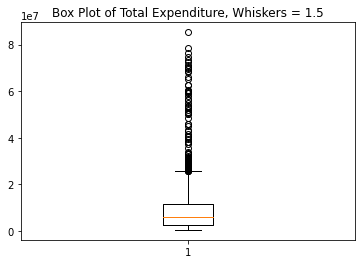

In [ ]:
plt.boxplot(us_ed["TOTAL_EXPENDITURE"])
plt.title('Box Plot of Total Expenditure, Whiskers = 1.5')
plt.show()

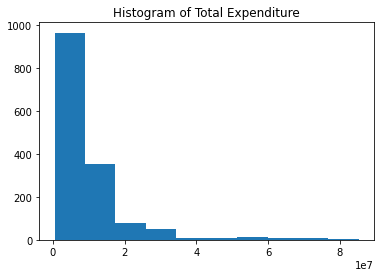

In [ ]:
plt.hist(us_ed["TOTAL_EXPENDITURE"])
plt.title("Histogram of Total Expenditure")
plt.show()

Both of these seem to have outliers at whiskers = 1.5

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

In [ ]:
#us_ed["log_tot_rev"] = np.log(us_ed["TOTAL_REVENUE"])
#us_ed["log_tot_exp"] = np.log(us_ed["TOTAL_EXPENDITURE"])

In [ ]:
from scipy.stats.mstats import winsorize

winsorized_rev = winsorize(us_ed["TOTAL_REVENUE"], (0, 0.10))
winsorized_exp = winsorize(us_ed["TOTAL_EXPENDITURE"], (0, 0.10))

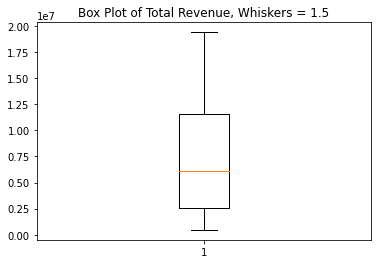

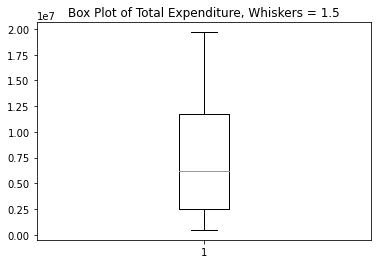

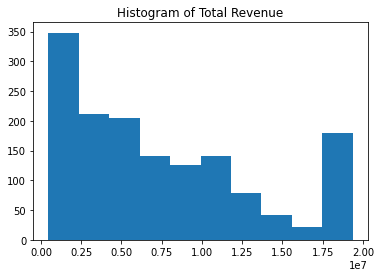

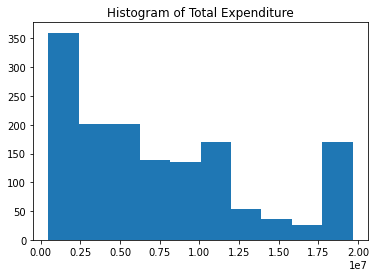

In [ ]:
plt.boxplot(winsorized_rev)
plt.title('Box Plot of Total Revenue, Whiskers = 1.5')
plt.show()

plt.boxplot(winsorized_exp)
plt.title('Box Plot of Total Expenditure, Whiskers = 1.5')
plt.show()

plt.hist(winsorized_rev)
plt.title("Histogram of Total Revenue")
plt.show()

plt.hist(winsorized_exp)
plt.title("Histogram of Total Expenditure")
plt.show()

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.


In [ ]:
us_ed["Deficit"] = us_ed['TOTAL_REVENUE'] - us_ed["TOTAL_EXPENDITURE"]

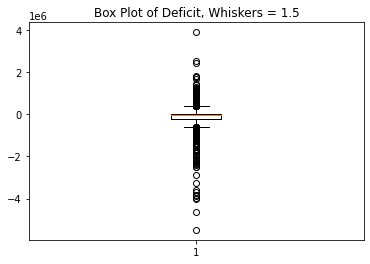

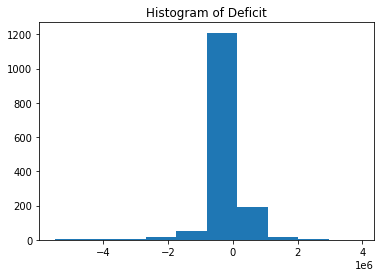

In [ ]:
plt.boxplot(us_ed["Deficit"])
plt.title('Box Plot of Deficit, Whiskers = 1.5')
plt.show()

plt.hist(us_ed["Deficit"])
plt.title("Histogram of Deficit")
plt.show()

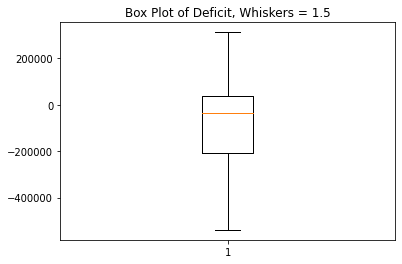

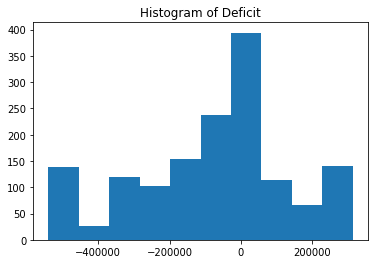

In [ ]:
winsorized_def = winsorize(us_ed["Deficit"], (0.075, 0.075))

plt.boxplot(winsorized_def)
plt.title('Box Plot of Deficit, Whiskers = 1.5')
plt.show()

plt.hist(winsorized_def)
plt.title("Histogram of Deficit")
plt.show()

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

In [ ]:
new_def = winsorized_rev - winsorized_exp

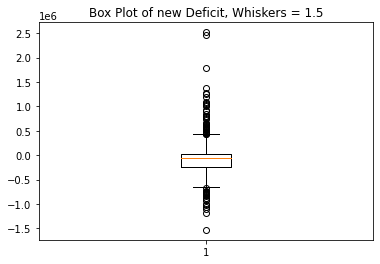

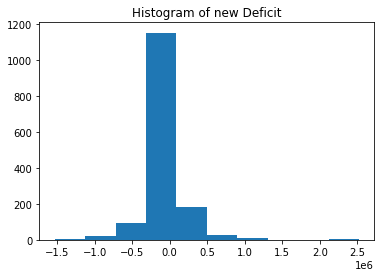

In [ ]:
plt.boxplot(new_def)
plt.title('Box Plot of new Deficit, Whiskers = 1.5')
plt.show()

plt.hist(new_def)
plt.title("Histogram of new Deficit")
plt.show()

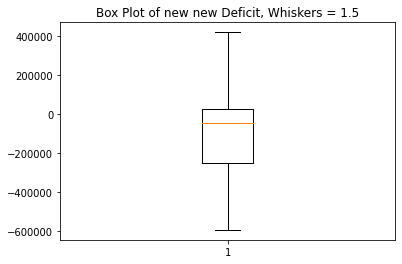

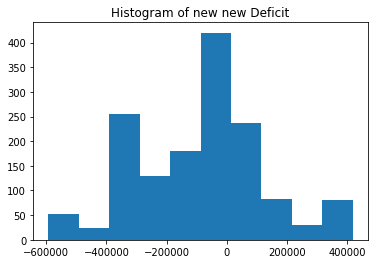

In [ ]:
winsorized_new_def = winsorize(new_def, (0.02, 0.035))

plt.boxplot(winsorized_new_def)
plt.title('Box Plot of new new Deficit, Whiskers = 1.5')
plt.show()

plt.hist(winsorized_new_def)
plt.title("Histogram of new new Deficit")
plt.show()

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [ ]:
us_ed["Q3"] = winsorized_def
us_ed["Q4"] = winsorized_new_def

In [ ]:
us_ed["Q3"].describe()

count      1492.000000
mean     -77754.051049
std      221290.841477
min     -539645.000000
25%     -209599.500000
50%      -34510.000000
75%       37044.000000
max      313256.000000
Name: Q3, dtype: float64

In [ ]:
us_ed["Q4"].describe()

count      1492.000000
mean     -79902.404266
std      211443.187686
min     -592845.000000
25%     -249134.000000
50%      -47525.500000
75%       25108.000000
max      418162.000000
Name: Q4, dtype: float64

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

I think that the method from question 4 is more appropriate, since you are altering the data less. By adjusting both expenditure and revenue, the deficit will be way off for any values with either outlier exp or outlier rev.